# Simulation Results Analysis

In [1]:
import pandas as pd
import geopandas as gpd

## 1 Overall SEIR

### 1.1 SEIR dynamics: Single-Thread one run

In [2]:
from src.tools import plot_overall_SEIR

In [3]:
df = pd.read_csv('data/simulation_results/seir_results_r1.csv').iloc[:, 1:]
df.head()

,Day,S,E,I,R,D
0,0,2791037,0,3,0,0
1,1,2791036,1,3,0,0
2,2,2791033,4,3,0,0
3,3,2791028,9,3,0,0
4,4,2791028,9,3,0,0


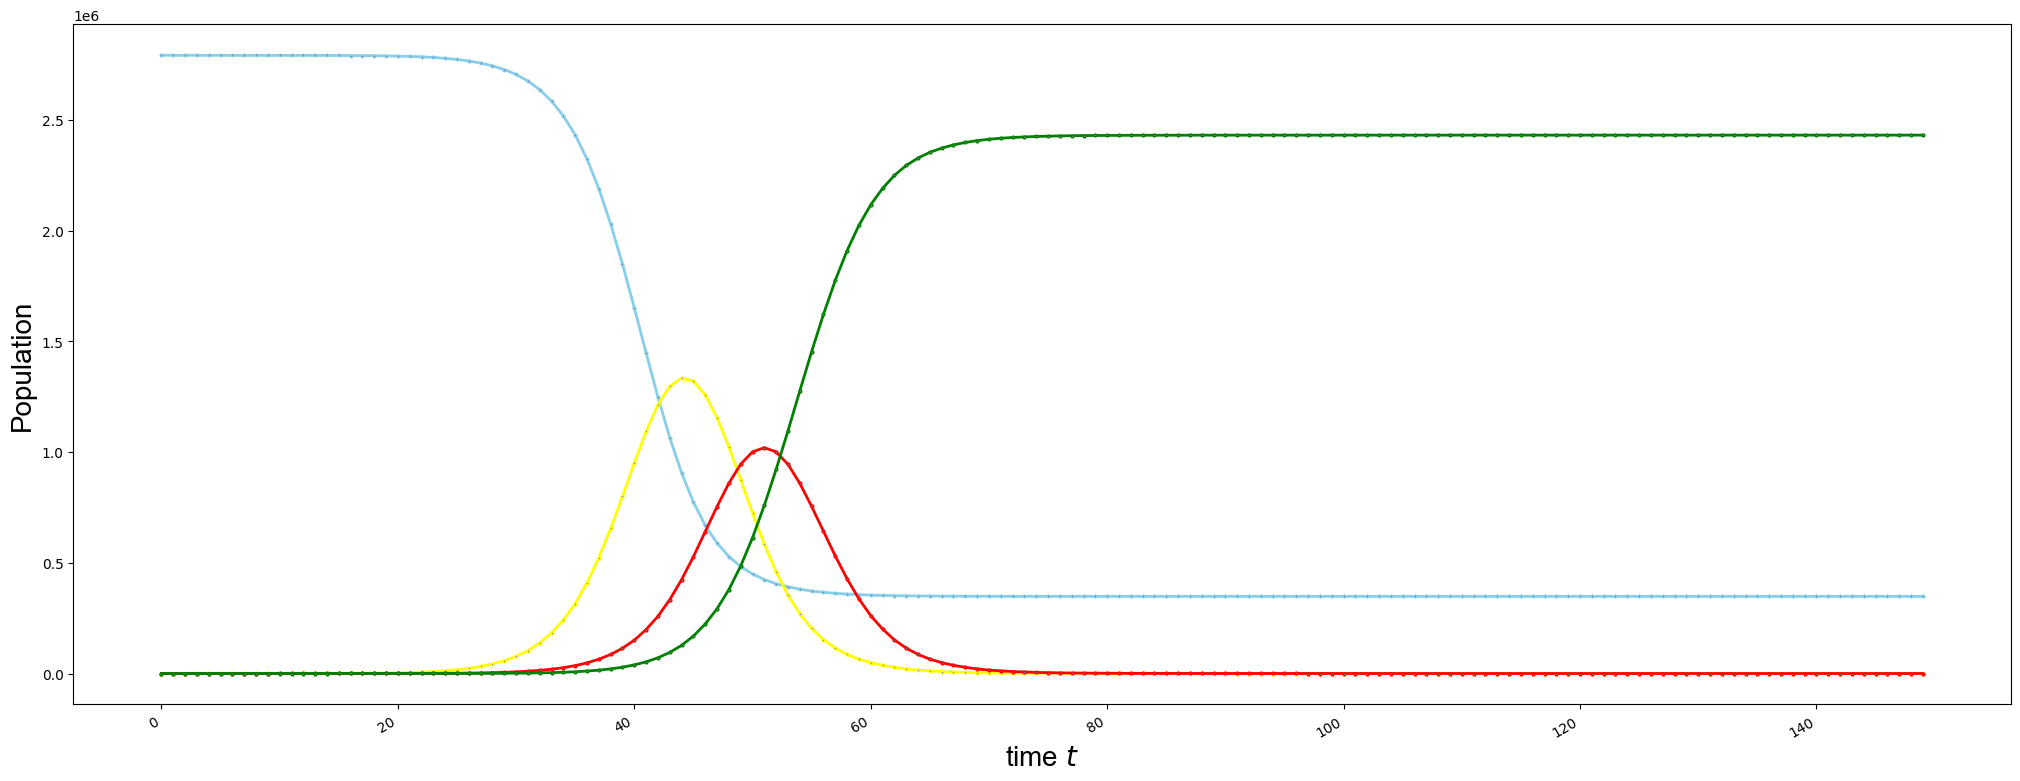

In [4]:
plot_overall_SEIR(df)

### 1.2 SEIR dynamics: Multi-Thread one run

In [5]:
df = pd.read_csv('data/simulation_results/seir_results_multi_disease.csv')
df.head()

,Unnamed: 0,Day,S,E,E1,E2,I,I1,I2,R,R1,R2,D
0,0,0,900658,0,0,0,2,2,0,0,0,0,0
1,1,1,900656,2,2,0,2,2,0,0,0,0,0
2,2,2,900656,2,2,0,2,2,0,0,0,0,0
3,3,3,900656,2,2,0,1,1,0,1,1,0,0
4,4,4,900656,2,2,0,1,1,0,1,1,0,0


In [6]:
from src.tools import plot_overall_SEIR

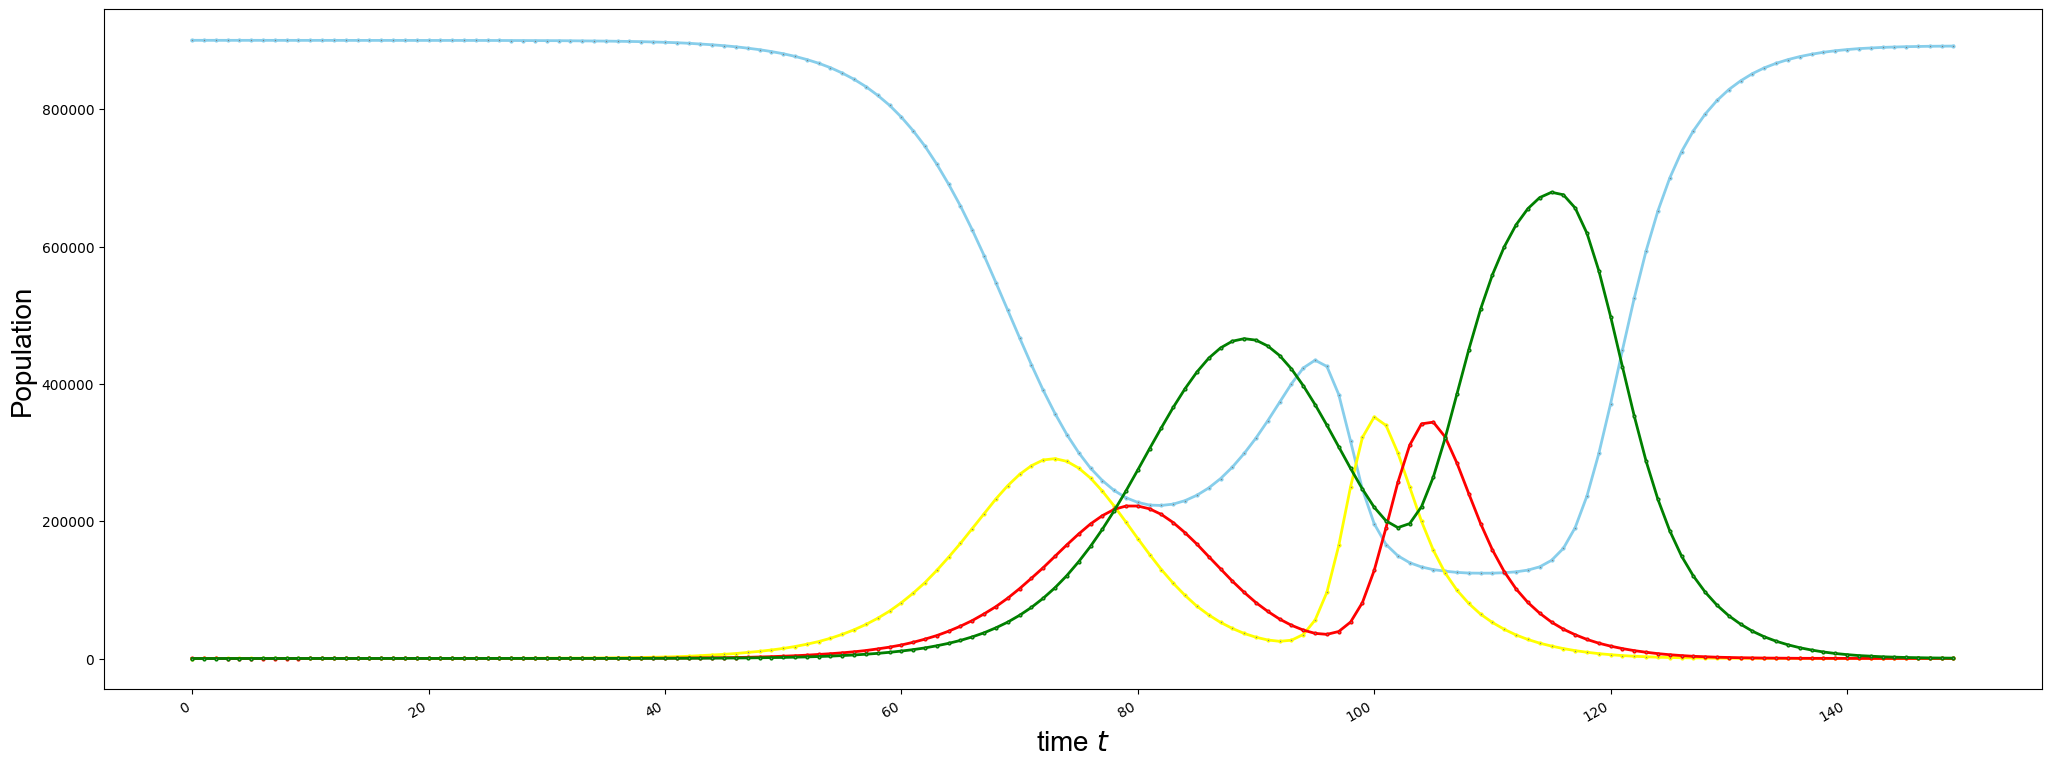

In [7]:
plot_overall_SEIR(df)

In [8]:
from src.tools import plot_multi_SEIR

   Unnamed: 0  Day       S  E  E1  E2  I  I1  I2  R  R1  R2  D
0           0    0  900658  0   0   0  2   2   0  0   0   0  0
1           1    1  900656  2   2   0  2   2   0  0   0   0  0
2           2    2  900656  2   2   0  2   2   0  0   0   0  0
3           3    3  900656  2   2   0  1   1   0  1   1   0  0
4           4    4  900656  2   2   0  1   1   0  1   1   0  0


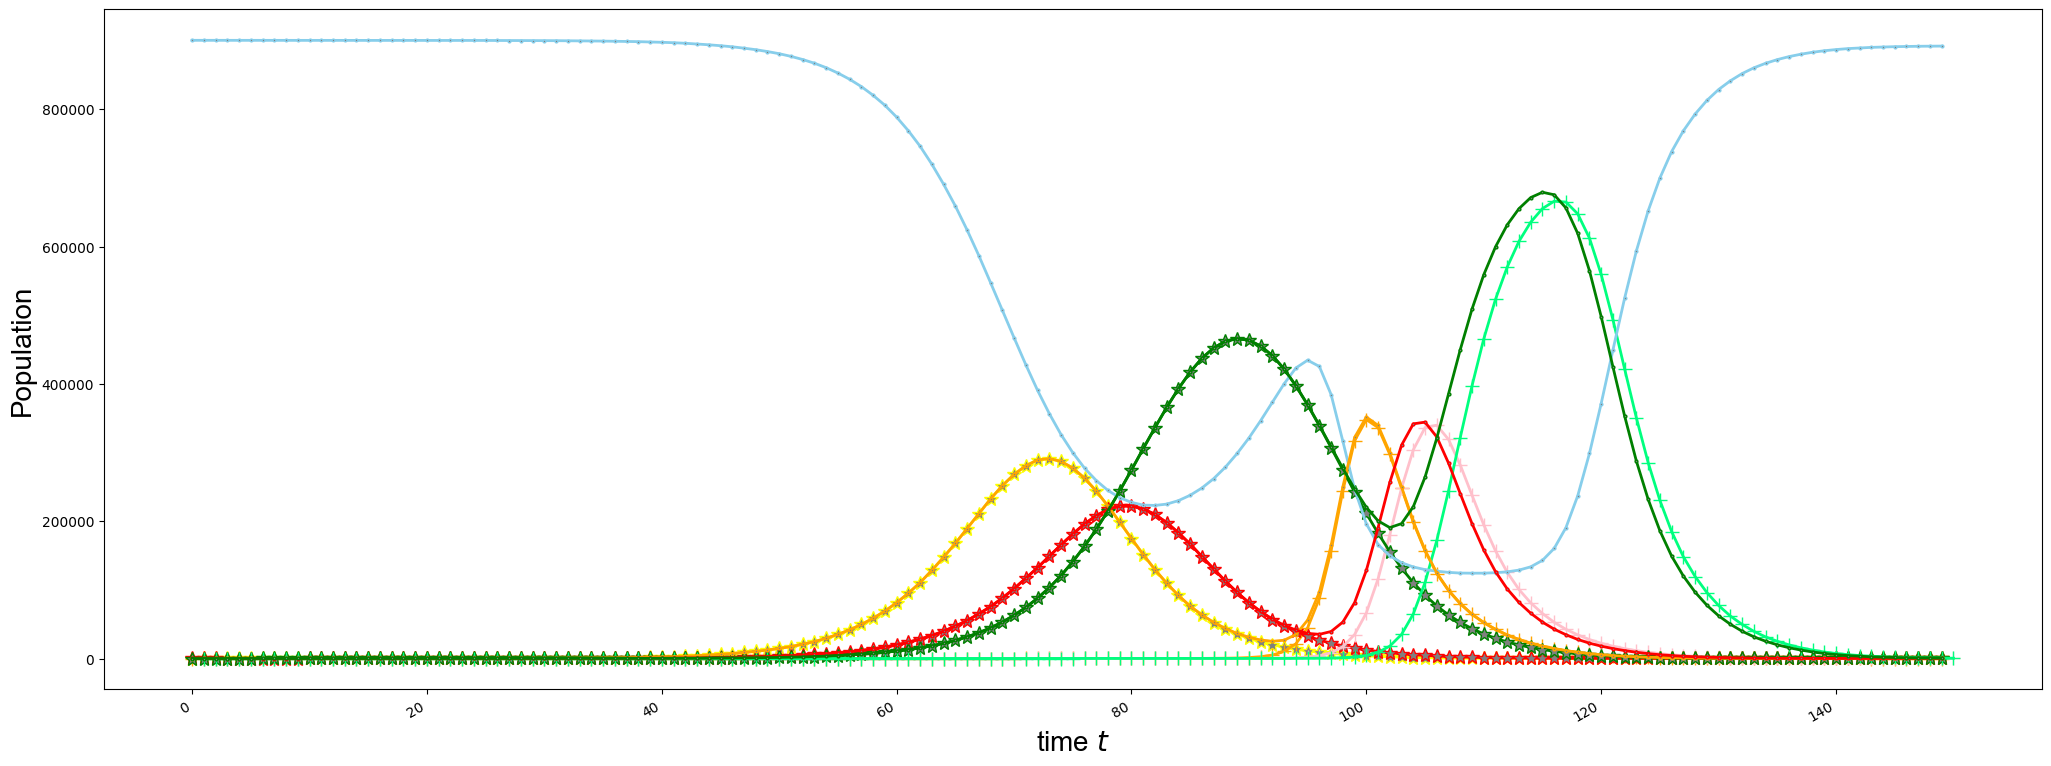

In [9]:
plot_multi_SEIR(df, INTRO= True)

## 2 Contact Tracing 

In [10]:
from src.tools import display_Spread_Tree

In [11]:
spread_tree = pd.read_csv('data/simulation_results/seir_results_r1_contact_tracing.csv').iloc[:,1:]
spread_tree.head()

,0,1,2,3
0,1,36029012902i2337,36029012902h1374,36029012902i2526
1,2,36029007304i4987,36029007304h517,36029007304i568
2,2,36029014803i2395,36029014803h1310,36029014803i3924
3,2,36029014803i2430,36029014803h1310,36029014803i3924
4,3,36029014803i3861,36029014801s2,36029014803i3925


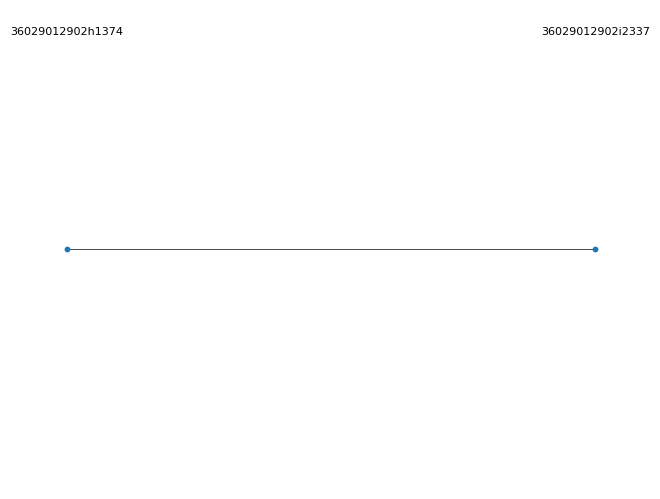

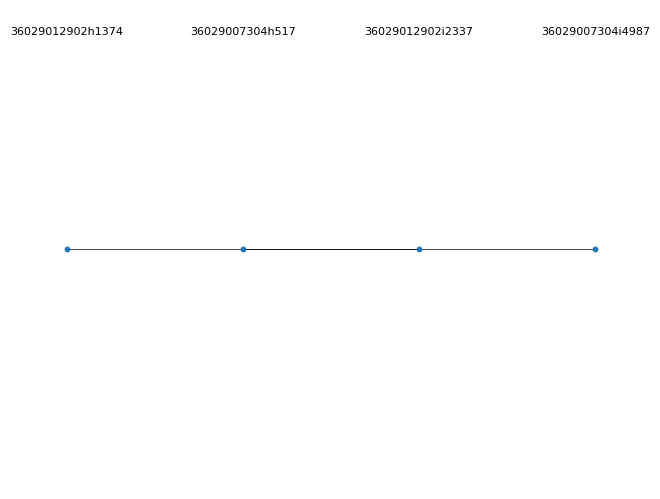

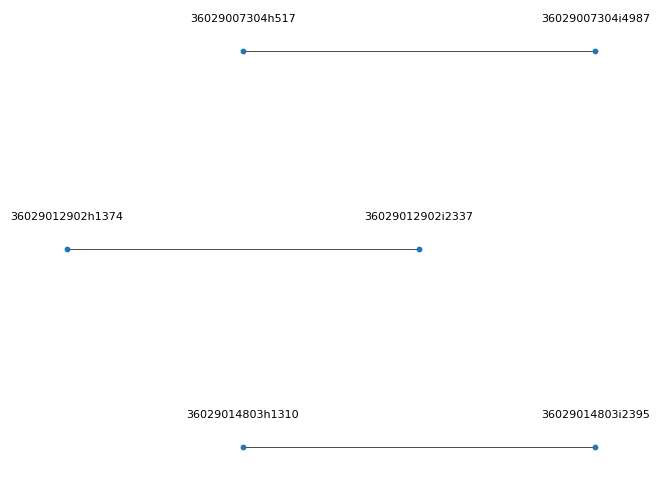

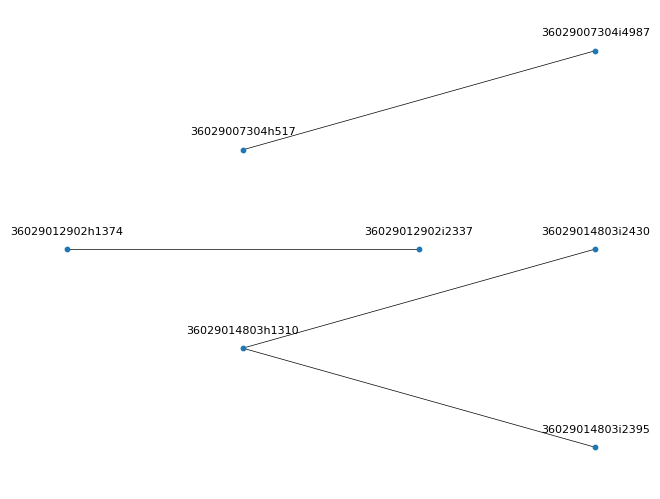

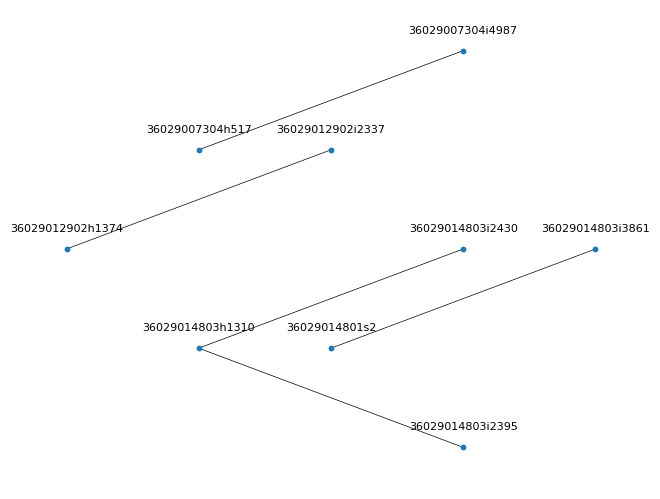

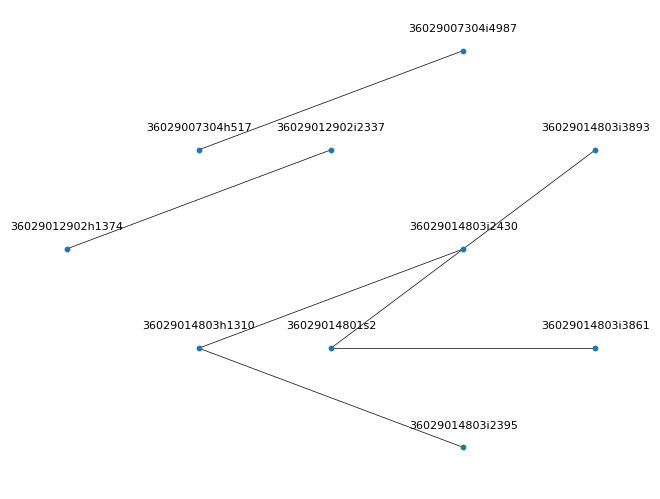

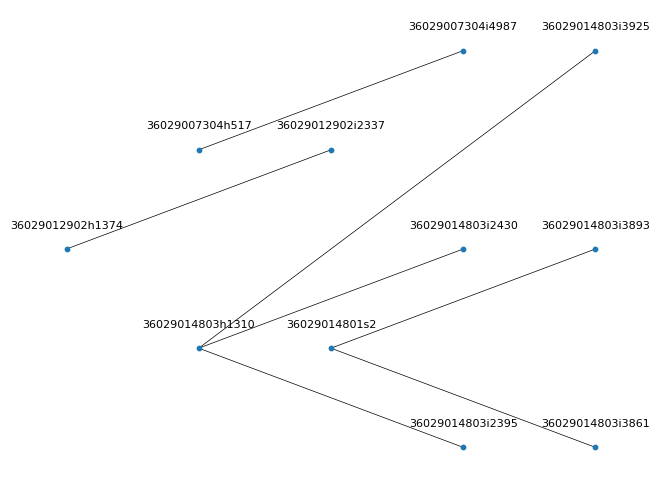

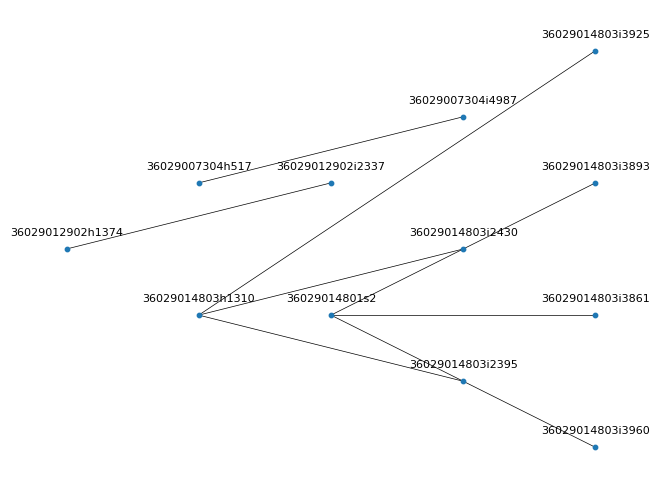

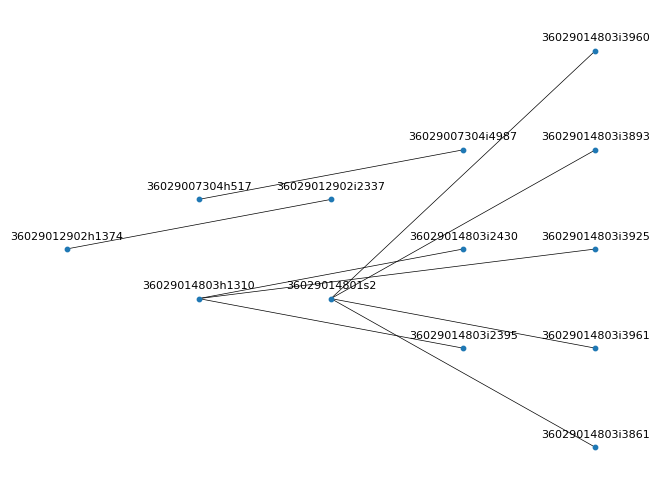

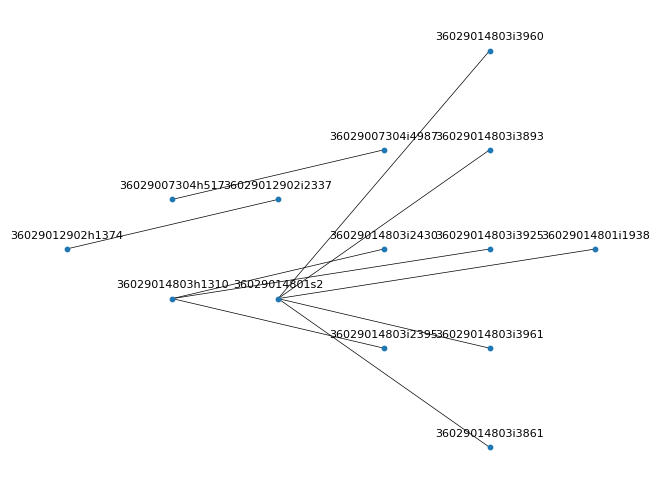

In [12]:
display_Spread_Tree(spread_tree)

## 3 Validation: sensitive Analysis

In [13]:
from src.tools import plot_SEIR_with_shade

### 3.1 R0: 3

In [14]:
multi_run_df = pd.read_csv("data/simulation_results/multi-run-results/multi_run_results.csv")

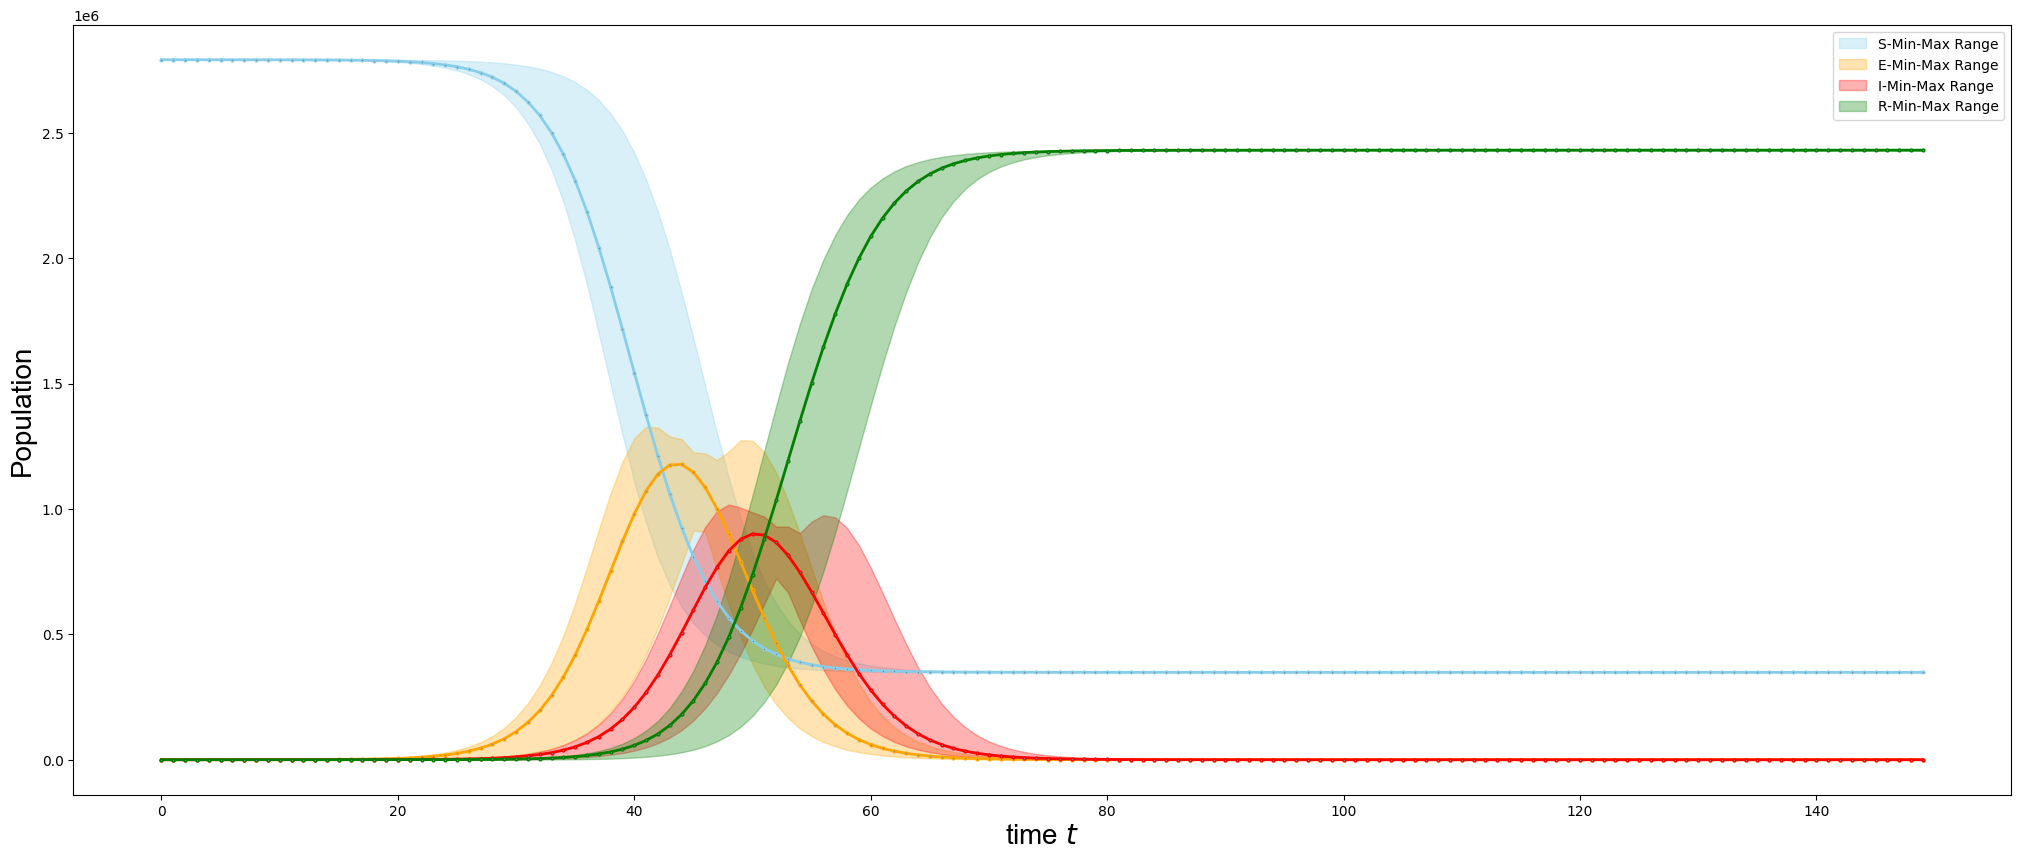

In [15]:
plot_SEIR_with_shade(multi_run_df.groupby(['Day']).min().reset_index(), 
          multi_run_df.groupby(['Day']).mean().reset_index(), 
          multi_run_df.groupby(['Day']).max().reset_index())

### 3.2 R0: 5

In [16]:
multi_run_df = pd.read_csv("data/simulation_results/multi-run-results/multi_run_results_r2.csv")

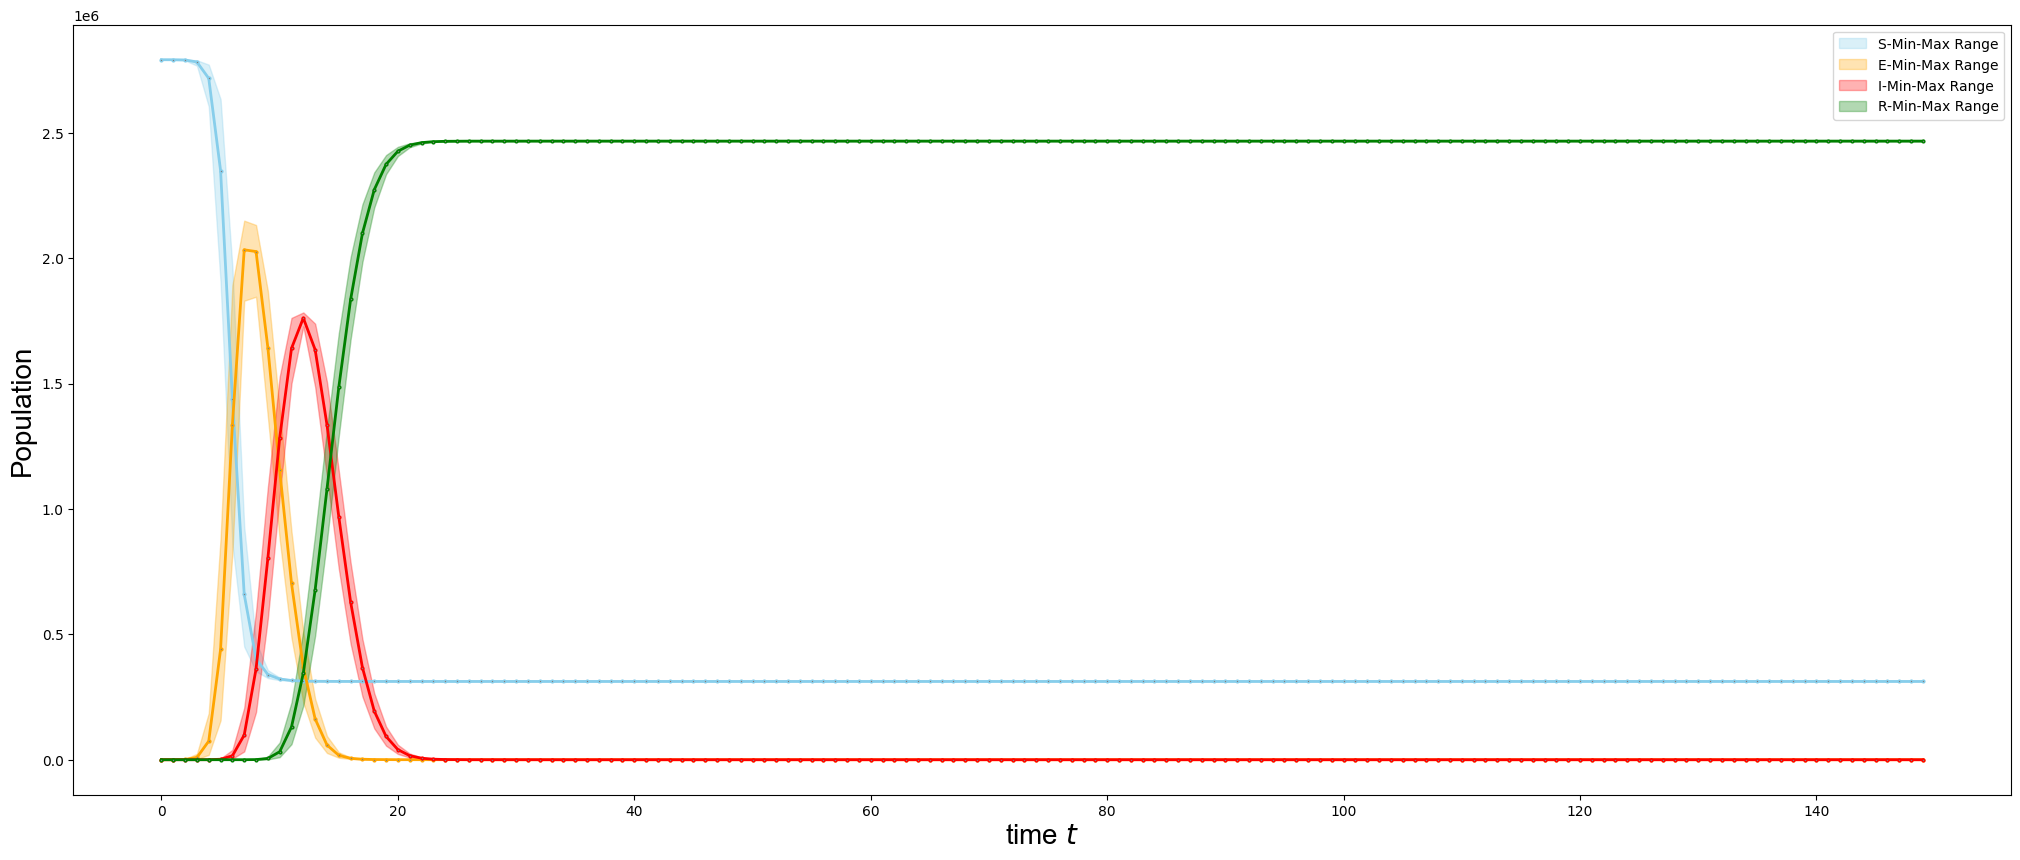

In [17]:
plot_SEIR_with_shade(multi_run_df.groupby(['Day']).min().reset_index(), 
          multi_run_df.groupby(['Day']).mean().reset_index(), 
          multi_run_df.groupby(['Day']).max().reset_index())

### 3.3 R0: 8

In [18]:
multi_run_df = pd.read_csv("data/simulation_results/multi-run-results/multi_run_results_r8.csv")

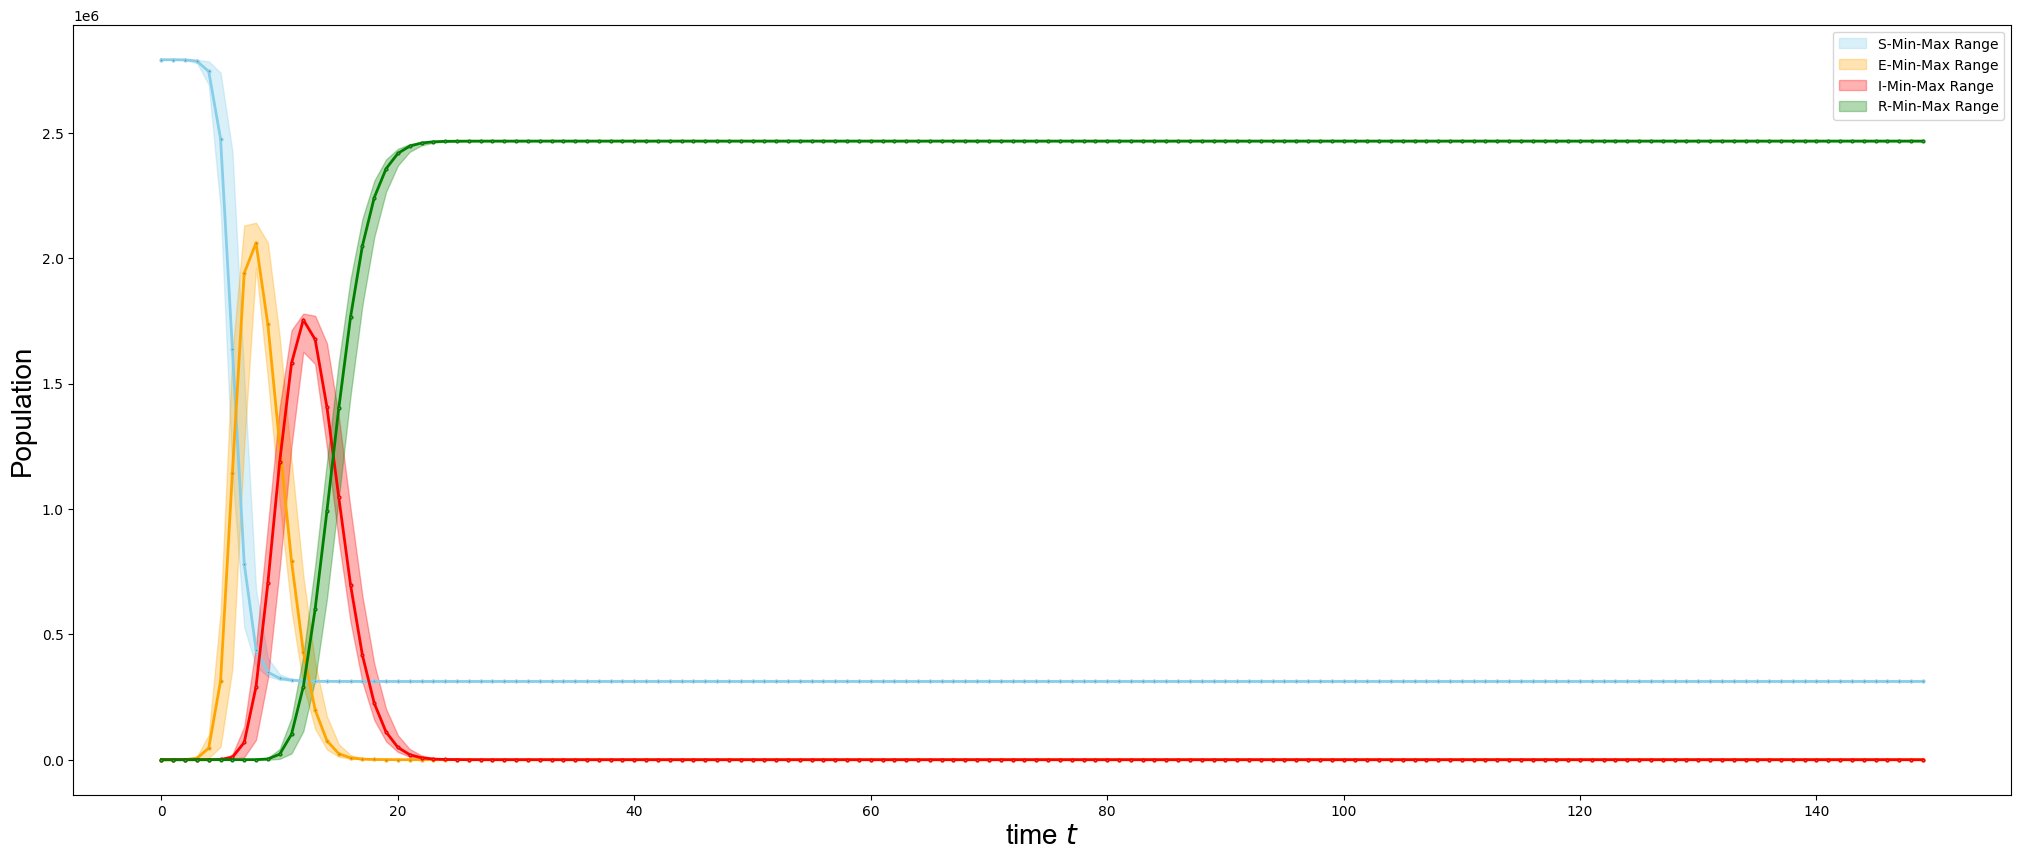

In [19]:
plot_SEIR_with_shade(multi_run_df.groupby(['Day']).min().reset_index(), 
          multi_run_df.groupby(['Day']).mean().reset_index(), 
          multi_run_df.groupby(['Day']).max().reset_index())

## 4 Validation: Location Tracking

In [20]:
census = gpd.read_file("data/input/Western_NY/shp/west_ny.shp")
census.head()

,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,...,DP0210001,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,geometry
0,36003940200,Census Tract 9402,1528843.0,26577.0,+42.2312992,-078.3028177,1,0,0,0,...,1,0,1,0,1,0.00,1.00,0.052233,0.000170,"POLYGON ((-78.30914 42.23885, -78.30617 42.238..."
1,36003950100,Census Tract 9501,328912886.0,1467772.0,+42.4022117,-077.8349167,2555,119,164,174,...,1040,841,199,2090,465,2.49,2.34,0.908608,0.036128,"POLYGON ((-77.92245 42.39777, -77.92262 42.398..."
2,36003950300,Census Tract 9503,232036827.0,2013701.0,+42.4693329,-078.1949069,4927,295,315,294,...,1434,1075,359,3029,851,2.82,2.37,0.729553,0.025619,"POLYGON ((-78.1542 42.4007, -78.15368 42.39863..."
3,36003950400,Census Tract 9504,287202861.0,3180152.0,+42.2965494,-078.2138436,3649,219,217,213,...,1466,1228,238,3116,533,2.54,2.24,0.821935,0.031708,"POLYGON ((-78.14253 42.2308, -78.1425 42.2307,..."
4,36003950500,Census Tract 9505,131390288.0,1929125.0,+42.1809786,-078.2297809,3799,205,226,252,...,1572,1216,356,2941,798,2.42,2.24,0.694129,0.014528,"POLYGON ((-78.2701 42.14525, -78.27009 42.1452..."


In [21]:
census = census.loc[:,['GEOID10','geometry','DP0010001']]
census.head()

,GEOID10,geometry,DP0010001
0,36003940200,"POLYGON ((-78.30914 42.23885, -78.30617 42.238...",1
1,36003950100,"POLYGON ((-77.92245 42.39777, -77.92262 42.398...",2555
2,36003950300,"POLYGON ((-78.1542 42.4007, -78.15368 42.39863...",4927
3,36003950400,"POLYGON ((-78.14253 42.2308, -78.1425 42.2307,...",3649
4,36003950500,"POLYGON ((-78.2701 42.14525, -78.27009 42.1452...",3799


<Axes: >

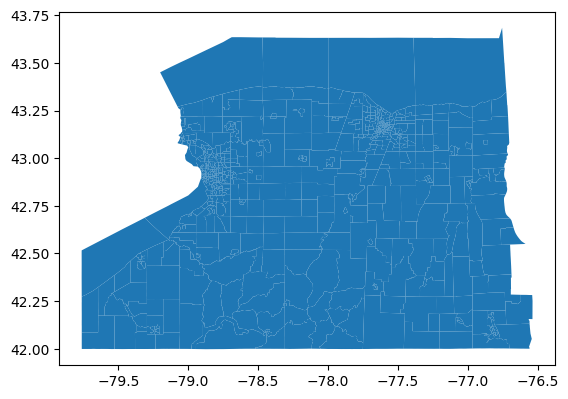

In [22]:
census.plot()

In [23]:
tracing_10 = pd.read_csv('data/simulation_results/west_ny_location_track/tract_data_map/wny_track_df10.csv').iloc[:, 1:]
tracing_10.head()

,day,ids
0,10,36029014803i2395
1,10,36029014803i2430


In [24]:
tracing_20 = pd.read_csv('data/simulation_results/west_ny_location_track/tract_data_map/wny_track_df20.csv').iloc[:, 1:]
tracing_20.head()

,day,ids
0,20,36013030200i48
1,20,36029000600i70
2,20,36029004401i2417
3,20,36029009501i4832
4,20,36029009502i5393


In [25]:
tracing_30 = pd.read_csv('data/simulation_results/west_ny_location_track/tract_data_map/wny_track_df30.csv').iloc[:, 1:]
tracing_30.head()

,day,ids
0,30,36003950100i1317
1,30,36003950300i3241
2,30,36003950300i3242
3,30,36003950300i3243
4,30,36003950900i1632


In [26]:
tracing_40 = pd.read_csv('data/simulation_results/west_ny_location_track/tract_data_map/wny_track_df40.csv').iloc[:, 1:]
tracing_40.head()

,day,ids
0,40,36003950100i1015
1,40,36003950100i1052
2,40,36003950100i1057
3,40,36003950100i1260
4,40,36003950100i1744


In [27]:
tracing_50 = pd.read_csv('data/simulation_results/west_ny_location_track/tract_data_map/wny_track_df50.csv').iloc[:, 1:]
tracing_50.head()

,day,ids
0,50,36003950100i10
1,50,36003950100i1000
2,50,36003950100i1002
3,50,36003950100i1007
4,50,36003950100i1008


In [28]:
def clean_results(data, census):
    #creat new columns
    data['GEOID10'] = data['ids'].str[:11]#[:10]#.head() #census
    data['i_count'] = 1
    df = data.groupby(by=["GEOID10"]).sum().reset_index().loc[:,['GEOID10', 'i_count']]
    #print(df)
    final_map_df = pd.merge(census, df, on="GEOID10", how='left').fillna(0)
    final_map_df['rate'] = final_map_df['i_count'] / final_map_df['DP0010001']
    final_map_df.plot(column='rate', cmap= 'cividis', legend=True)
    return final_map_df#.fillna(0)

,GEOID10,geometry,DP0010001,i_count,rate
0,36003940200,"POLYGON ((-78.30914 42.23885, -78.30617 42.238...",1,0.0,0.0
1,36003950100,"POLYGON ((-77.92245 42.39777, -77.92262 42.398...",2555,0.0,0.0
2,36003950300,"POLYGON ((-78.1542 42.4007, -78.15368 42.39863...",4927,0.0,0.0
3,36003950400,"POLYGON ((-78.14253 42.2308, -78.1425 42.2307,...",3649,0.0,0.0
4,36003950500,"POLYGON ((-78.2701 42.14525, -78.27009 42.1452...",3799,0.0,0.0


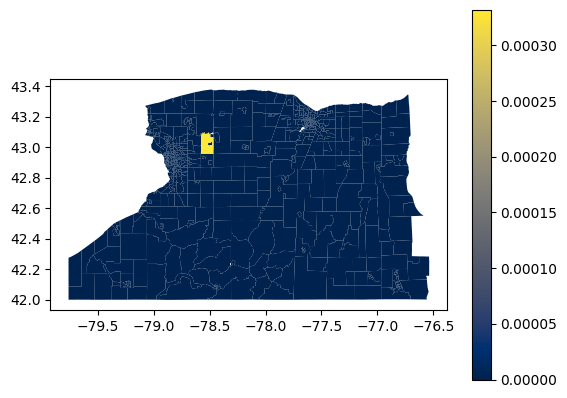

In [29]:
infect_10 = clean_results(tracing_10, census)
infect_10.head()

In [30]:
infect_10.i_count.unique()

array([0., 2.])

In [31]:
#save to shp for further mapping
infect_10.to_file("track_day10.shp", driver='ESRI Shapefile')

array([ 0.,  1.,  2.,  3.,  8., 11.,  6.])

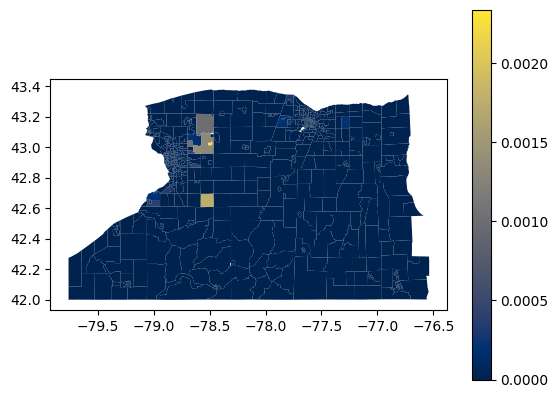

In [32]:
infect_20 = clean_results(tracing_20,census)
infect_20.i_count.unique()

In [33]:
infect_20.to_file("track_day20.shp", driver='ESRI Shapefile')

array([  0.,   1.,   3.,  22.,   2.,  15.,   6.,   8.,   5.,   9.,  21.,
         4.,  11.,  47.,  13.,  10.,  25.,  17.,  51.,  16.,   7.,  14.,
        18.,  33.,  19.,  20.,  44.,  61., 160.,  88., 162.,  42.,  35.,
        27.,  23.,  57.])

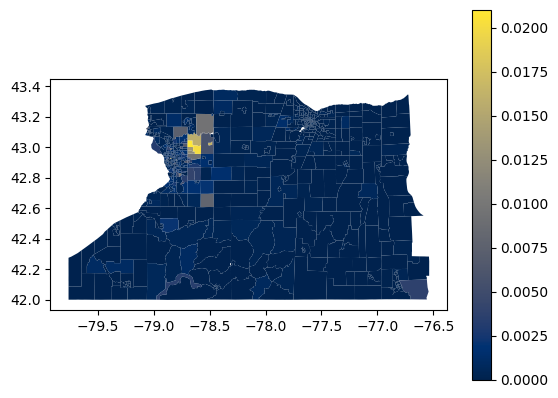

In [34]:
infect_30 = clean_results(tracing_30,census)
infect_30.i_count.unique()

In [35]:
infect_30.to_file("track_day30.shp", driver='ESRI Shapefile')

array([0.000e+00, 3.100e+01, 3.360e+02, 5.100e+01, 4.900e+01, 2.000e+01,
       2.800e+01, 5.400e+01, 2.600e+01, 4.400e+01, 2.900e+01, 4.300e+01,
       1.000e+00, 2.910e+02, 5.000e+01, 7.100e+01, 3.500e+01, 8.900e+01,
       5.500e+01, 2.300e+01, 3.600e+01, 3.700e+01, 1.890e+02, 4.000e+01,
       1.100e+01, 3.000e+01, 1.300e+01, 8.800e+01, 1.400e+01, 4.800e+01,
       4.200e+01, 1.230e+02, 3.800e+01, 4.100e+01, 3.200e+01, 4.600e+01,
       2.100e+01, 4.700e+01, 2.700e+01, 2.110e+02, 1.900e+01, 1.500e+01,
       1.700e+01, 1.600e+01, 9.000e+00, 2.200e+01, 8.000e+00, 2.500e+01,
       4.500e+01, 3.000e+00, 1.200e+01, 7.000e+00, 1.800e+01, 1.000e+01,
       1.200e+02, 1.150e+02, 1.500e+02, 1.070e+02, 2.090e+02, 1.660e+02,
       2.550e+02, 9.900e+01, 1.870e+02, 2.150e+02, 1.010e+02, 7.200e+01,
       9.000e+01, 1.670e+02, 3.240e+02, 8.400e+01, 8.000e+01, 1.620e+02,
       1.160e+02, 1.260e+02, 2.980e+02, 1.360e+02, 1.440e+02, 6.200e+01,
       8.600e+01, 1.730e+02, 1.190e+02, 3.400e+01, 

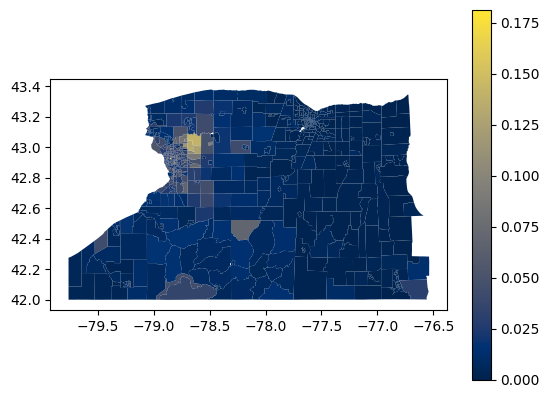

In [36]:
infect_40 = clean_results(tracing_40,census)
infect_40.i_count.unique()

In [37]:
infect_40.to_file("track_day40.shp", driver='ESRI Shapefile')

array([   0.,  570., 1558., 1100.,  995.,  899.,  850., 2622.,  835.,
        713.,  637.,  999.,  793.,  121., 2010., 1106., 1142., 1326.,
       1203., 1346.,  810.,  685.,  965., 1131., 1066.,  757., 1473.,
       1280.,  555.,  863.,  624.,  928.,  545., 1119., 1139.,  453.,
       1093.,  824.,  953.,  873.,  830.,  997.,  662.,  787.,  646.,
        898.,  652.,  714.,  912., 1775.,  975., 1114., 1121.,  613.,
        606.,  858.,  476.,  631.,  512.,  486.,  582.,  632.,  611.,
        605., 1012.,  485.,  338.,  409.,  293.,  387.,  849.,  587.,
        364.,  384.,  667.,  693.,  233.,  267.,  307.,  816.,  310.,
        434.,  546.,  441., 1633.,  673., 1800., 1490., 1734.,  892.,
       2209., 1040., 1033.,  563.,  715.,  589., 1077., 1395.,  806.,
        906.,  855., 1018.,  712., 1085., 1063., 1002., 1247.,  878.,
       1856., 1364.,  389., 1354., 1604., 1367., 2521., 1581., 1074.,
       1981., 1091., 2436., 1307., 1864., 1459.,  954.,  705., 1233.,
       1318., 1609.,

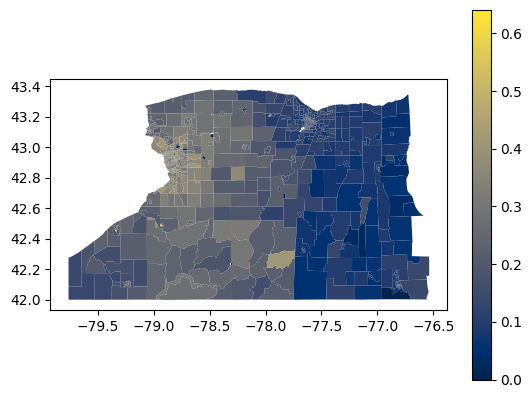

In [38]:
infect_50 = clean_results(tracing_50,census)
infect_50.i_count.unique()

In [39]:
infect_50.to_file("track_day50.shp", driver='ESRI Shapefile')